step-1 :
Business Problem Understanding
1. Indentify realtionship between total advertisting spend and sales?
2. Our next ad campaign wil have a total spend of $ 200,000 , how many units do we expect to sell as a result of this?

step-2 :
Data Understanding
 
Data 
This sample data dispalys sales for a particular product as a function of advertising budgets (in dollars) for TV , radio, and newspaper media.

Indepenent variables
1. TV: advertising dollars spent on Tv for a single product in a given market (in dollars)
2. Radia: advertising dollars spent on radia
3. Newspaper: advertising dollars spent on newspaper

Target Variable
1. sales: sales of a single product in a given market
2. collect and load data
3. data set understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib  as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.tail()

,TV,radio,newspaper,sales
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500
199,232100,8600,8700,13400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


step-3 :
Preprocessing
1. by combining all the features , we get the "total spend"

In [5]:
df["total_spend"]=df["TV"] + df["radio"] + df["newspaper"]
df.head()


,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [6]:
print(df.columns)
df.drop(columns=["TV","radio","newspaper"],inplace=True)
df.head()



Index(['TV', 'radio', 'newspaper', 'sales', 'total_spend'], dtype='object')


,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


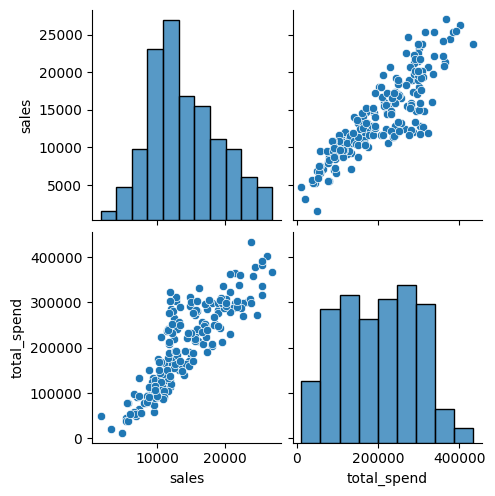

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your previous pairplot
sns.pairplot(df)
plt.show() 

In [9]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [10]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

Data Wangling

In [11]:
#no encoding is required (no categorical data)

Create X and Y

In [12]:
X=df[["total_spend"]]
Y=df["sales"]

Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

step -4 :
Modelling

In [57]:
#import
from sklearn.linear_model import LinearRegression

# save the model
model =LinearRegression()

#fit
model.fit(X_train,Y_train)


print("intercept",model.intercept_)
print("Coefficients :",model.coef_)


intercept 4169.512013489044
Coefficients : [0.0489571]


Step - 5 :
Evaluation

predictions

In [58]:
ypred_test=model.predict(X_test)

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

In [59]:
from sklearn.metrics import mean_absolute_error
print("Test MAE: ",mean_absolute_error(Y_test,ypred_test))

Test MAE:  2088.4273558466143


Mean Squarred Error(MSE) is the mean of the squared errors:

In [60]:
from sklearn.metrics import mean_squared_error
print("Test MSE :", mean_squared_error(Y_test,ypred_test))

Test MSE : 7779806.406885764


Root Mean Squared Error is the square root of the mean of the squared errors:

In [61]:
print("Test RMSE : ",np.sqrt(mean_squared_error(Y_test,ypred_test)))

Test RMSE :  2789.230432733331


In [62]:
#test R2
print("Test R2 :", model.score(X_test,Y_test))

Test R2 : 0.7535196255373878


Model selection
Checklist 1: Check whether model is good or either having overfitting/ underfitting problem

test accuracy =train accuracy

In [63]:
#prediction on train data
ypred_train=model.predict(X_train)
#Train R2
print("Train R2: ",model.score(X_train,Y_train))

Train R2:  0.7524092686260718


Checklist 2: whether the Test Accuracy =Cross validation Score

In [64]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,Y,cv=5)
print(scores)
print("Cross Validation Score:",scores.mean())

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


Checklist 3: check whether, it satisfies the Business problem requiements

Checklist 4: (only for Linear Regression): Check for Assumptions

1. Linearity of Errors

In [65]:
error = Y_test-ypred_test


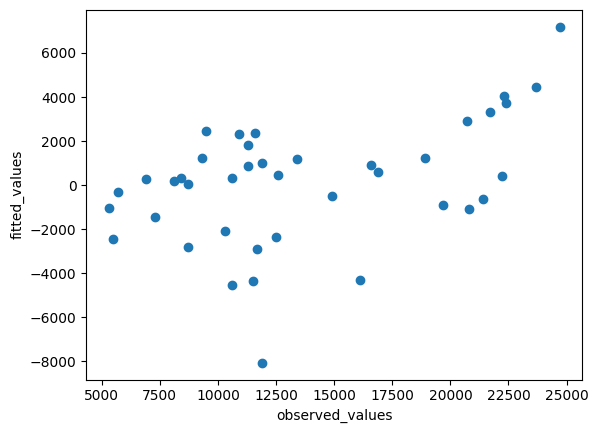

In [66]:
plt.scatter(Y_test,error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

2. Normality of Errors

In [67]:
error.skew()

-0.3207498673436375

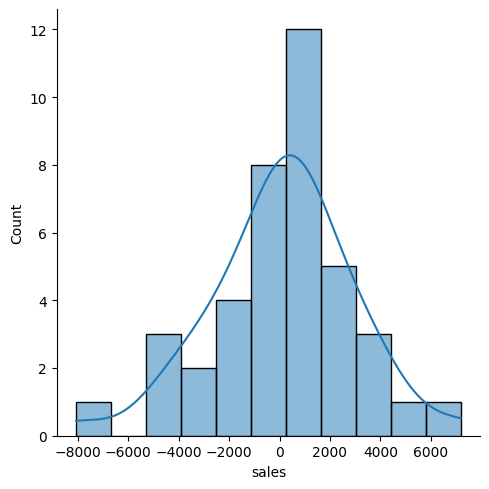

In [68]:
sns.displot(error,kde=True)
plt.show()

3.equal Variance of Error (Homoscadesicity)


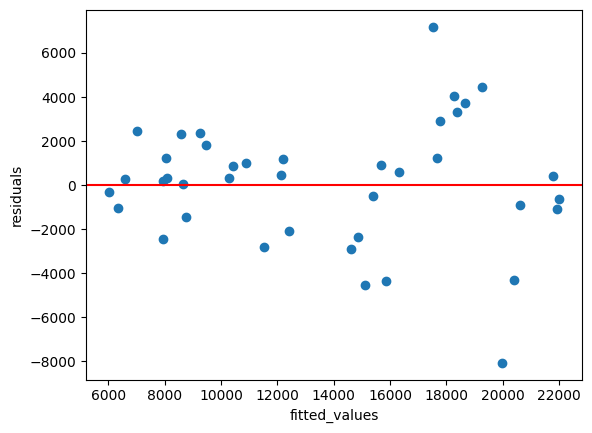

In [70]:
from turtle import color


plt.scatter(ypred_test,error)
plt.axhline(y=0,color="red")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

4. Variables significance

In [72]:
import statsmodels.formula.api as smf
model2=smf.ols("Y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           5.06e-62
Time:                        11:37:57   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Final Model

In [77]:
#modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print("Intercept :",model.intercept_)
print("coefficients :",model.coef_)

#prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evalution
print("Train R2 :",model.score(X_train,Y_train))
print("Test R2 :",model.score(X_test,Y_test))
print("Cross Validation Score :",cross_val_score(model,X,Y,cv=5).mean())

Intercept : 4169.512013489044
coefficients : [0.0489571]
Train R2 : 0.7524092686260718
Test R2 : 0.7535196255373878
Cross Validation Score : 0.7433783178555419


interpreting the coefficients
1. A 1 unit increase in total spend is associated with a increase of 0.0489 units in sales
2. thsi basically means that for every $10,000 dollars spend on Ads , we could expect 478 more units sold.

use the model to make predictions on a new value. For a total spend of 200k on Ads , how many units could we expect to be sold?

In [78]:
new_data = pd.DataFrame({"total_spend":[200000]})
new_data

,total_spend
0,200000


In [79]:
model.predict(new_data)

array([13960.93124868])

save a model

In [80]:
from joblib import dump
dump(model, "sales_model.joblib")


['sales_model.joblib']

Load a model & predict

In [81]:
from joblib import load
loaded_model = load ("sales_model.joblib")
loaded_model.predict(new_data)


array([13960.93124868])